In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

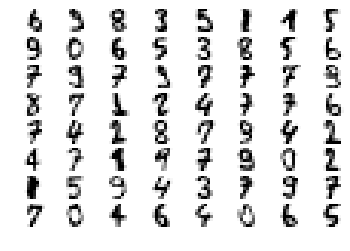

In [2]:
from random import randint

for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(digits.images[randint(0, digits.images.shape[0])], cmap='Greys')
plt.show()

In [3]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
def get_winner(class1, class2):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = 2

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])


    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i == class1:
            class1_indexes.extend(digits_indexes[i])
        elif i == class2:
            class2_indexes.extend(digits_indexes[i])


    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("Class1:{} #class1:{}".format(class1,len(class1_label)))
    print("Class2:{} #class2:{}".format(class2,len(class2_label)))

    samplesize = len(class1_label) + len(class2_label)
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 67)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [6]:
#class1 = [0, 2, 4, 6, 8]
#winner1 = get_winner(class1)

In [7]:
winner_list = []

for class1 in range(0,9):
    for class2 in range(class1+1, 10):
        winner = get_winner(class1, class2)
        winner_list.append(winner)

Class1:0 #class1:162
Class2:1 #class2:163

 ****** Running generation 0 ****** 

Population's average fitness: 0.50545 stdev: 0.15620
Best fitness: 0.94462 - size: (2, 13) - species 1 - id 146
Average adjusted fitness: 0.480
Mean genetic distance 2.909, standard deviation 0.473
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 4.081 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56872 stdev: 0.16814
Best fitness: 0.94462 - size: (2, 13) - species 1 - id 146
Average adjusted fitness: 0.500
Mean genetic distance 3.050, standard deviation 0.459
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 4.783 sec (4.432 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60504 stdev: 0.17728
Best fitness: 0.98462 - size: (2, 11) - species 2 - id 499
Average adjusted fitness: 0.402
Mean genetic distance 3.110, standard deviation 0.476
Population of 203 members in 41 species
Total extinctio

Population's average fitness: 0.68928 stdev: 0.21482
Best fitness: 0.98758 - size: (5, 20) - species 24 - id 833
Average adjusted fitness: 0.611
Mean genetic distance 3.041, standard deviation 0.488
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 3.792 sec (3.599 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.71063 stdev: 0.19823
Best fitness: 0.99379 - size: (7, 23) - species 19 - id 954
Average adjusted fitness: 0.603
Mean genetic distance 3.077, standard deviation 0.471
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 3.938 sec (3.655 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.73057 stdev: 0.20767
Best fitness: 0.99379 - size: (7, 23) - species 19 - id 954
Average adjusted fitness: 0.583
Mean genetic distance 3.054, standard deviation 0.466
Population of 193 members in 34 species
Total extinctions: 0
Generation time: 3.922 sec (3.693 average)

 ****** Runn

Mean genetic distance 3.173, standard deviation 0.487
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 3.844 sec (3.614 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.75073 stdev: 0.19463
Best fitness: 0.99694 - size: (6, 19) - species 2 - id 1073
Average adjusted fitness: 0.577
Mean genetic distance 3.147, standard deviation 0.478
Population of 198 members in 39 species
Total extinctions: 0
Generation time: 3.829 sec (3.636 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.75144 stdev: 0.20308
Best fitness: 0.99694 - size: (4, 18) - species 20 - id 1583
Average adjusted fitness: 0.636
Mean genetic distance 3.130, standard deviation 0.476
Population of 198 members in 40 species
Total extinctions: 0
Generation time: 4.122 sec (3.750 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.75792 stdev: 0.19615
Best fitness: 1.00000 - size: (5, 18) - species 34 - id 1699

B

Population's average fitness: 0.76183 stdev: 0.19258
Best fitness: 0.99690 - size: (6, 23) - species 16 - id 1820
Average adjusted fitness: 0.460
Mean genetic distance 3.225, standard deviation 0.510
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 4.105 sec (4.014 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.77082 stdev: 0.18651
Best fitness: 0.99690 - size: (6, 23) - species 16 - id 1820
Average adjusted fitness: 0.384
Mean genetic distance 3.204, standard deviation 0.507
Population of 197 members in 33 species
Total extinctions: 0
Generation time: 4.159 sec (4.029 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.76950 stdev: 0.19564
Best fitness: 0.99690 - size: (6, 23) - species 16 - id 1820
Average adjusted fitness: 0.471
Mean genetic distance 3.193, standard deviation 0.516
Population of 192 members in 29 species
Total extinctions: 0
Generation time: 4.218 sec (4.048 average)

 ******

Mean genetic distance 3.094, standard deviation 0.467
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 3.828 sec (3.493 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.67914 stdev: 0.18246
Best fitness: 0.98466 - size: (4, 17) - species 35 - id 946
Average adjusted fitness: 0.450
Mean genetic distance 3.107, standard deviation 0.471
Population of 205 members in 39 species
Total extinctions: 0
Generation time: 3.931 sec (3.542 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.70171 stdev: 0.17762
Best fitness: 0.98466 - size: (4, 17) - species 35 - id 946
Average adjusted fitness: 0.535
Mean genetic distance 3.107, standard deviation 0.445
Population of 208 members in 40 species
Total extinctions: 0
Generation time: 4.180 sec (3.606 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.71298 stdev: 0.18187
Best fitness: 0.98466 - size: (4, 17) - species 36 - id 946
Avera

Population's average fitness: 0.70980 stdev: 0.20393
Best fitness: 0.99692 - size: (4, 16) - species 35 - id 673
Average adjusted fitness: 0.524
Mean genetic distance 3.128, standard deviation 0.469
Population of 196 members in 37 species
Total extinctions: 0
Generation time: 3.899 sec (3.522 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.74349 stdev: 0.20307
Best fitness: 0.99692 - size: (3, 15) - species 10 - id 1524
Average adjusted fitness: 0.522
Mean genetic distance 3.124, standard deviation 0.463
Population of 205 members in 37 species
Total extinctions: 0
Generation time: 3.650 sec (3.535 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.75643 stdev: 0.20334
Best fitness: 0.99692 - size: (4, 16) - species 35 - id 673
Average adjusted fitness: 0.543
Mean genetic distance 3.123, standard deviation 0.469
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 4.152 sec (3.667 average)

 ****** Ru

Mean genetic distance 2.845, standard deviation 0.448
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 2.759 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59292 stdev: 0.17658
Best fitness: 0.95963 - size: (2, 14) - species 7 - id 347
Average adjusted fitness: 0.512
Mean genetic distance 2.889, standard deviation 0.446
Population of 202 members in 24 species
Total extinctions: 0
Generation time: 3.085 sec (2.922 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63417 stdev: 0.18353
Best fitness: 0.99068 - size: (4, 15) - species 7 - id 534
Average adjusted fitness: 0.567
Mean genetic distance 2.874, standard deviation 0.461
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 3.450 sec (3.098 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.65894 stdev: 0.17608
Best fitness: 0.99689 - size: (5, 17) - species 4 - id 688
Average adjusted fitness:

Population's average fitness: 0.76777 stdev: 0.18710
Best fitness: 0.99373 - size: (5, 17) - species 11 - id 955
Average adjusted fitness: 0.614
Mean genetic distance 3.091, standard deviation 0.480
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 3.939 sec (3.767 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.74788 stdev: 0.19563
Best fitness: 0.99373 - size: (5, 17) - species 11 - id 955
Average adjusted fitness: 0.596
Mean genetic distance 3.109, standard deviation 0.478
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 4.033 sec (3.814 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.75464 stdev: 0.20024
Best fitness: 0.99373 - size: (5, 17) - species 11 - id 955
Average adjusted fitness: 0.604
Mean genetic distance 3.089, standard deviation 0.481
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 4.034 sec (3.871 average)

 ****** Ru

Population's average fitness: 0.70299 stdev: 0.14670
Best fitness: 0.97214 - size: (7, 20) - species 10 - id 1661
Average adjusted fitness: 0.344
Mean genetic distance 3.148, standard deviation 0.479
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 3.741 sec (3.555 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.69704 stdev: 0.14390
Best fitness: 0.97214 - size: (7, 20) - species 10 - id 1661
Average adjusted fitness: 0.309
Mean genetic distance 3.147, standard deviation 0.480
Population of 199 members in 41 species
Total extinctions: 0
Generation time: 3.816 sec (3.588 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.71049 stdev: 0.14887
Best fitness: 0.97214 - size: (7, 20) - species 10 - id 1661
Average adjusted fitness: 0.319
Mean genetic distance 3.178, standard deviation 0.481
Population of 197 members in 41 species
Total extinctions: 0
Generation time: 3.831 sec (3.621 average)

 ******

Population's average fitness: 0.71443 stdev: 0.17241
Best fitness: 0.97214 - size: (7, 20) - species 10 - id 1661
Average adjusted fitness: 0.418
Mean genetic distance 3.311, standard deviation 0.528
Population of 194 members in 20 species
Total extinctions: 0
Generation time: 4.242 sec (4.226 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.70944 stdev: 0.16257
Best fitness: 0.97214 - size: (7, 20) - species 10 - id 1661
Average adjusted fitness: 0.449
Mean genetic distance 3.299, standard deviation 0.555
Population of 198 members in 19 species
Total extinctions: 0
Generation time: 4.328 sec (4.257 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.70837 stdev: 0.17495
Best fitness: 0.97214 - size: (7, 20) - species 10 - id 1661
Average adjusted fitness: 0.553
Mean genetic distance 3.312, standard deviation 0.557
Population of 194 members in 18 species
Total extinctions: 0
Generation time: 4.260 sec (4.274 average)

 ******

Population's average fitness: 0.72598 stdev: 0.17155
Best fitness: 0.97214 - size: (7, 20) - species 10 - id 1661
Average adjusted fitness: 0.272
Mean genetic distance 3.160, standard deviation 0.596
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 4.815 sec (4.813 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.72763 stdev: 0.16936
Best fitness: 0.97214 - size: (7, 20) - species 10 - id 1661
Average adjusted fitness: 0.461
Mean genetic distance 3.136, standard deviation 0.597
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 4.482 sec (4.792 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.73351 stdev: 0.17340
Best fitness: 0.97214 - size: (7, 20) - species 10 - id 1661
Average adjusted fitness: 0.510
Mean genetic distance 3.156, standard deviation 0.606
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 4.623 sec (4.790 average)

 ******

Population's average fitness: 0.74436 stdev: 0.15533
Best fitness: 0.98780 - size: (4, 17) - species 12 - id 1906
Average adjusted fitness: 0.416
Mean genetic distance 3.231, standard deviation 0.461
Population of 196 members in 44 species
Total extinctions: 0
Generation time: 3.866 sec (3.787 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.74846 stdev: 0.16030
Best fitness: 0.99390 - size: (5, 14) - species 12 - id 2447
Average adjusted fitness: 0.379
Mean genetic distance 3.228, standard deviation 0.464
Population of 197 members in 44 species
Total extinctions: 0
Generation time: 3.796 sec (3.792 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.74574 stdev: 0.15482
Best fitness: 0.99390 - size: (5, 14) - species 12 - id 2447
Average adjusted fitness: 0.332
Mean genetic distance 3.242, standard deviation 0.461
Population of 198 members in 43 species
Total extinctions: 0
Generation time: 3.961 sec (3.814 average)

 ******

Population's average fitness: 0.72227 stdev: 0.17430
Best fitness: 0.99695 - size: (10, 29) - species 19 - id 3606
Average adjusted fitness: 0.539
Mean genetic distance 3.285, standard deviation 0.527
Population of 203 members in 21 species
Total extinctions: 0
Generation time: 4.340 sec (4.115 average)

 ****** Running generation 42 ****** 

Population's average fitness: 0.72149 stdev: 0.17925
Best fitness: 0.99695 - size: (10, 29) - species 19 - id 3606
Average adjusted fitness: 0.482
Mean genetic distance 3.279, standard deviation 0.540
Population of 195 members in 20 species
Total extinctions: 0
Generation time: 4.312 sec (4.136 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.75347 stdev: 0.16548
Best fitness: 0.99695 - size: (10, 29) - species 19 - id 3606
Average adjusted fitness: 0.510
Mean genetic distance 3.276, standard deviation 0.528
Population of 204 members in 22 species
Total extinctions: 0
Generation time: 4.378 sec (4.176 average)

 ***

Population's average fitness: 0.76217 stdev: 0.17792
Best fitness: 0.99695 - size: (10, 29) - species 19 - id 3606
Average adjusted fitness: 0.498
Mean genetic distance 3.208, standard deviation 0.542
Population of 197 members in 20 species
Total extinctions: 0
Generation time: 4.865 sec (4.800 average)

 ****** Running generation 66 ****** 

Population's average fitness: 0.75063 stdev: 0.19514
Best fitness: 0.99695 - size: (10, 29) - species 19 - id 3606
Average adjusted fitness: 0.599
Mean genetic distance 3.204, standard deviation 0.553
Population of 196 members in 20 species
Total extinctions: 0
Generation time: 4.804 sec (4.735 average)
Class1:1 #class1:163
Class2:4 #class2:161

 ****** Running generation 0 ****** 

Population's average fitness: 0.50802 stdev: 0.11995
Best fitness: 0.91975 - size: (2, 13) - species 2 - id 87
Average adjusted fitness: 0.324
Mean genetic distance 2.867, standard deviation 0.478
Population of 200 members in 22 species
Total extinctions: 0
Generation 

Population's average fitness: 0.73785 stdev: 0.16879
Best fitness: 0.95062 - size: (8, 25) - species 11 - id 2175
Average adjusted fitness: 0.559
Mean genetic distance 3.251, standard deviation 0.499
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 4.097 sec (4.003 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.73761 stdev: 0.15426
Best fitness: 0.95062 - size: (8, 25) - species 11 - id 2175
Average adjusted fitness: 0.285
Mean genetic distance 3.258, standard deviation 0.497
Population of 197 members in 28 species
Total extinctions: 0
Generation time: 4.324 sec (4.044 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.74091 stdev: 0.16492
Best fitness: 0.95062 - size: (8, 25) - species 11 - id 2175
Average adjusted fitness: 0.479
Mean genetic distance 3.258, standard deviation 0.510
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 4.390 sec (4.087 average)

 ******

Population's average fitness: 0.72865 stdev: 0.16729
Best fitness: 0.96605 - size: (4, 19) - species 9 - id 6724
Average adjusted fitness: 0.379
Mean genetic distance 3.152, standard deviation 0.564
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 5.143 sec (4.583 average)

 ****** Running generation 47 ****** 

Population's average fitness: 0.73380 stdev: 0.17037
Best fitness: 0.96605 - size: (4, 19) - species 9 - id 6724
Average adjusted fitness: 0.433
Mean genetic distance 3.160, standard deviation 0.577
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 4.771 sec (4.613 average)

 ****** Running generation 48 ****** 

Population's average fitness: 0.73702 stdev: 0.16203
Best fitness: 0.96605 - size: (4, 19) - species 9 - id 6724
Average adjusted fitness: 0.411
Mean genetic distance 3.176, standard deviation 0.571
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 4.980 sec (4.661 average)

 ****** Ru

Population's average fitness: 0.63043 stdev: 0.16099
Best fitness: 0.96636 - size: (2, 13) - species 9 - id 676
Average adjusted fitness: 0.479
Mean genetic distance 3.064, standard deviation 0.498
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 3.269 sec (3.113 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.63662 stdev: 0.15950
Best fitness: 0.96636 - size: (2, 13) - species 9 - id 676
Average adjusted fitness: 0.569
Mean genetic distance 3.108, standard deviation 0.492
Population of 204 members in 31 species
Total extinctions: 0
Generation time: 3.437 sec (3.178 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.65475 stdev: 0.14974
Best fitness: 0.96636 - size: (2, 13) - species 9 - id 676
Average adjusted fitness: 0.447
Mean genetic distance 3.104, standard deviation 0.510
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 3.474 sec (3.227 average)

 ****** Running

Population's average fitness: 0.71856 stdev: 0.16517
Best fitness: 0.97248 - size: (3, 14) - species 9 - id 1923
Average adjusted fitness: 0.396
Mean genetic distance 3.223, standard deviation 0.546
Population of 193 members in 27 species
Total extinctions: 0
Generation time: 3.859 sec (3.912 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.71877 stdev: 0.16373
Best fitness: 0.97248 - size: (3, 14) - species 9 - id 1923
Average adjusted fitness: 0.410
Mean genetic distance 3.216, standard deviation 0.534
Population of 197 members in 27 species
Total extinctions: 0
Generation time: 3.943 sec (3.896 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.72407 stdev: 0.16545
Best fitness: 0.97248 - size: (3, 14) - species 9 - id 1923
Average adjusted fitness: 0.427
Mean genetic distance 3.237, standard deviation 0.554
Population of 193 members in 25 species
Total extinctions: 0
Generation time: 4.028 sec (3.927 average)

 ****** Ru

Population's average fitness: 0.76399 stdev: 0.15942
Best fitness: 0.98165 - size: (3, 15) - species 9 - id 5068
Average adjusted fitness: 0.326
Mean genetic distance 3.031, standard deviation 0.568
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 3.927 sec (4.063 average)

 ****** Running generation 52 ****** 

Population's average fitness: 0.75716 stdev: 0.17247
Best fitness: 0.98165 - size: (3, 15) - species 9 - id 5068
Average adjusted fitness: 0.398
Mean genetic distance 2.998, standard deviation 0.559
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 3.967 sec (4.064 average)

 ****** Running generation 53 ****** 

Population's average fitness: 0.76299 stdev: 0.17012
Best fitness: 0.98165 - size: (3, 15) - species 9 - id 5068
Average adjusted fitness: 0.487
Mean genetic distance 2.989, standard deviation 0.536
Population of 202 members in 20 species
Total extinctions: 0
Generation time: 4.017 sec (4.037 average)

 ****** Ru

Population's average fitness: 0.69515 stdev: 0.17072
Best fitness: 0.96012 - size: (4, 15) - species 23 - id 1217
Average adjusted fitness: 0.516
Mean genetic distance 3.157, standard deviation 0.498
Population of 200 members in 41 species
Total extinctions: 0
Generation time: 3.670 sec (3.430 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.68704 stdev: 0.16684
Best fitness: 0.98773 - size: (8, 19) - species 27 - id 1431
Average adjusted fitness: 0.522
Mean genetic distance 3.165, standard deviation 0.502
Population of 199 members in 41 species
Total extinctions: 0
Generation time: 3.642 sec (3.451 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.71250 stdev: 0.16288
Best fitness: 0.98773 - size: (8, 19) - species 27 - id 1431
Average adjusted fitness: 0.487
Mean genetic distance 3.186, standard deviation 0.491
Population of 201 members in 42 species
Total extinctions: 0
Generation time: 3.662 sec (3.533 average)

 ****** 

Population's average fitness: 0.75623 stdev: 0.18596
Best fitness: 0.98773 - size: (8, 19) - species 27 - id 1431
Average adjusted fitness: 0.518
Mean genetic distance 3.242, standard deviation 0.495
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 4.038 sec (4.080 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.77080 stdev: 0.17576
Best fitness: 0.98773 - size: (8, 19) - species 27 - id 1431
Average adjusted fitness: 0.360
Mean genetic distance 3.243, standard deviation 0.493
Population of 196 members in 29 species
Total extinctions: 0
Generation time: 4.227 sec (4.114 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.75147 stdev: 0.19889
Best fitness: 0.98773 - size: (8, 19) - species 27 - id 1431
Average adjusted fitness: 0.692
Mean genetic distance 3.238, standard deviation 0.494
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 4.176 sec (4.138 average)

 ******

Population's average fitness: 0.75117 stdev: 0.20675
Best fitness: 0.99387 - size: (4, 20) - species 30 - id 5724
Average adjusted fitness: 0.649
Mean genetic distance 3.207, standard deviation 0.570
Population of 204 members in 19 species
Total extinctions: 0
Generation time: 4.446 sec (4.424 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.76263 stdev: 0.19032
Best fitness: 0.99387 - size: (4, 20) - species 30 - id 5724
Average adjusted fitness: 0.477
Mean genetic distance 3.225, standard deviation 0.590
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 4.579 sec (4.434 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.74495 stdev: 0.18819
Best fitness: 0.99387 - size: (4, 20) - species 30 - id 5724
Average adjusted fitness: 0.376
Mean genetic distance 3.206, standard deviation 0.589
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 4.497 sec (4.436 average)

 ******

Population's average fitness: 0.72017 stdev: 0.15972
Best fitness: 0.97523 - size: (6, 21) - species 34 - id 1885
Average adjusted fitness: 0.349
Mean genetic distance 3.106, standard deviation 0.486
Population of 196 members in 39 species
Total extinctions: 0
Generation time: 3.778 sec (3.784 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.72414 stdev: 0.16607
Best fitness: 0.97523 - size: (6, 21) - species 34 - id 1885
Average adjusted fitness: 0.621
Mean genetic distance 3.142, standard deviation 0.480
Population of 193 members in 39 species
Total extinctions: 0
Generation time: 3.867 sec (3.821 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.71430 stdev: 0.16587
Best fitness: 0.97523 - size: (6, 21) - species 34 - id 1885
Average adjusted fitness: 0.467
Mean genetic distance 3.130, standard deviation 0.481
Population of 204 members in 39 species
Total extinctions: 0
Generation time: 3.808 sec (3.777 average)

 ******

Population's average fitness: 0.70601 stdev: 0.19970
Best fitness: 0.98142 - size: (7, 23) - species 34 - id 4961
Average adjusted fitness: 0.520
Mean genetic distance 3.229, standard deviation 0.547
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 4.444 sec (4.292 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.71724 stdev: 0.18307
Best fitness: 0.98142 - size: (7, 23) - species 34 - id 4961
Average adjusted fitness: 0.453
Mean genetic distance 3.238, standard deviation 0.549
Population of 195 members in 18 species
Total extinctions: 0
Generation time: 4.449 sec (4.322 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.74335 stdev: 0.18363
Best fitness: 0.98142 - size: (7, 23) - species 34 - id 4961
Average adjusted fitness: 0.498
Mean genetic distance 3.251, standard deviation 0.534
Population of 197 members in 19 species
Total extinctions: 0
Generation time: 4.804 sec (4.395 average)

 ******

Population's average fitness: 0.69909 stdev: 0.18606
Best fitness: 0.98762 - size: (11, 38) - species 31 - id 7941
Average adjusted fitness: 0.475
Mean genetic distance 3.182, standard deviation 0.618
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 5.122 sec (5.117 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.69683 stdev: 0.18866
Best fitness: 0.98762 - size: (11, 38) - species 31 - id 7941
Average adjusted fitness: 0.527
Mean genetic distance 3.164, standard deviation 0.606
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 5.025 sec (5.121 average)

 ****** Running generation 63 ****** 

Population's average fitness: 0.69388 stdev: 0.19126
Best fitness: 0.99381 - size: (12, 41) - species 31 - id 9722
Average adjusted fitness: 0.519
Mean genetic distance 3.163, standard deviation 0.616
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 5.086 sec (5.113 average)

 ***

Population's average fitness: 0.65973 stdev: 0.13405
Best fitness: 0.90625 - size: (8, 26) - species 27 - id 1343
Average adjusted fitness: 0.410
Mean genetic distance 3.224, standard deviation 0.491
Population of 195 members in 34 species
Total extinctions: 0
Generation time: 3.916 sec (3.897 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.67551 stdev: 0.13082
Best fitness: 0.90625 - size: (8, 26) - species 27 - id 1343
Average adjusted fitness: 0.482
Mean genetic distance 3.238, standard deviation 0.476
Population of 207 members in 34 species
Total extinctions: 0
Generation time: 4.177 sec (3.947 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.67017 stdev: 0.13169
Best fitness: 0.90625 - size: (8, 26) - species 27 - id 1343
Average adjusted fitness: 0.359
Mean genetic distance 3.259, standard deviation 0.486
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 4.209 sec (3.999 average)

 ******

Population's average fitness: 0.65363 stdev: 0.14131
Best fitness: 0.90938 - size: (9, 27) - species 27 - id 5664
Average adjusted fitness: 0.323
Mean genetic distance 3.263, standard deviation 0.596
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 4.493 sec (4.397 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.64994 stdev: 0.13969
Best fitness: 0.91250 - size: (10, 30) - species 42 - id 6331
Average adjusted fitness: 0.274
Mean genetic distance 3.255, standard deviation 0.577
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 4.419 sec (4.415 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.65019 stdev: 0.13792
Best fitness: 0.91250 - size: (10, 30) - species 42 - id 6331
Average adjusted fitness: 0.284
Mean genetic distance 3.222, standard deviation 0.568
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 4.358 sec (4.423 average)

 ****

Population's average fitness: 0.71885 stdev: 0.15341
Best fitness: 0.94063 - size: (13, 33) - species 49 - id 8520
Average adjusted fitness: 0.273
Mean genetic distance 3.163, standard deviation 0.647
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 5.466 sec (5.352 average)
Class1:1 #class1:163
Class2:9 #class2:162

 ****** Running generation 0 ****** 

Population's average fitness: 0.49891 stdev: 0.12085
Best fitness: 0.87077 - size: (2, 13) - species 2 - id 26
Average adjusted fitness: 0.382
Mean genetic distance 2.830, standard deviation 0.477
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 2.820 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57689 stdev: 0.13282
Best fitness: 0.88308 - size: (2, 14) - species 2 - id 371
Average adjusted fitness: 0.399
Mean genetic distance 2.940, standard deviation 0.498
Population of 202 members in 22 species
Total extinctions: 0
Generation time: 3.019 sec (2.9

Population's average fitness: 0.72907 stdev: 0.15767
Best fitness: 0.94154 - size: (6, 23) - species 3 - id 1850
Average adjusted fitness: 0.434
Mean genetic distance 3.204, standard deviation 0.515
Population of 191 members in 24 species
Total extinctions: 0
Generation time: 3.775 sec (3.794 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.73348 stdev: 0.15979
Best fitness: 0.94154 - size: (6, 23) - species 3 - id 1850
Average adjusted fitness: 0.483
Mean genetic distance 3.214, standard deviation 0.526
Population of 194 members in 23 species
Total extinctions: 0
Generation time: 3.886 sec (3.794 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.73786 stdev: 0.15222
Best fitness: 0.94154 - size: (6, 23) - species 3 - id 1850
Average adjusted fitness: 0.516
Mean genetic distance 3.257, standard deviation 0.528
Population of 196 members in 23 species
Total extinctions: 0
Generation time: 3.988 sec (3.825 average)

 ****** Ru

Population's average fitness: 0.74349 stdev: 0.16332
Best fitness: 0.96000 - size: (7, 24) - species 3 - id 6977
Average adjusted fitness: 0.607
Mean genetic distance 3.270, standard deviation 0.548
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 4.318 sec (4.366 average)

 ****** Running generation 48 ****** 

Population's average fitness: 0.74697 stdev: 0.16177
Best fitness: 0.96000 - size: (7, 24) - species 3 - id 6977
Average adjusted fitness: 0.568
Mean genetic distance 3.272, standard deviation 0.536
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 4.355 sec (4.365 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.73198 stdev: 0.16107
Best fitness: 0.96000 - size: (7, 24) - species 3 - id 6977
Average adjusted fitness: 0.475
Mean genetic distance 3.278, standard deviation 0.543
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 4.495 sec (4.368 average)

 ****** Ru

Population's average fitness: 0.63102 stdev: 0.15103
Best fitness: 0.93538 - size: (5, 18) - species 10 - id 811
Average adjusted fitness: 0.424
Mean genetic distance 3.084, standard deviation 0.498
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 3.437 sec (3.126 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.62995 stdev: 0.15986
Best fitness: 0.93538 - size: (5, 18) - species 10 - id 811
Average adjusted fitness: 0.421
Mean genetic distance 3.073, standard deviation 0.477
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 3.535 sec (3.194 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.66082 stdev: 0.15302
Best fitness: 0.94462 - size: (7, 22) - species 10 - id 1075
Average adjusted fitness: 0.431
Mean genetic distance 3.141, standard deviation 0.486
Population of 194 members in 38 species
Total extinctions: 0
Generation time: 3.497 sec (3.237 average)

 ****** Run

Population's average fitness: 0.72852 stdev: 0.16974
Best fitness: 0.96308 - size: (5, 20) - species 30 - id 1562
Average adjusted fitness: 0.517
Mean genetic distance 3.289, standard deviation 0.494
Population of 195 members in 37 species
Total extinctions: 0
Generation time: 4.174 sec (4.109 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.73321 stdev: 0.16190
Best fitness: 0.96308 - size: (5, 20) - species 30 - id 1562
Average adjusted fitness: 0.294
Mean genetic distance 3.274, standard deviation 0.496
Population of 191 members in 37 species
Total extinctions: 0
Generation time: 4.091 sec (4.113 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.73468 stdev: 0.16411
Best fitness: 0.96308 - size: (5, 20) - species 30 - id 1562
Average adjusted fitness: 0.436
Mean genetic distance 3.277, standard deviation 0.507
Population of 194 members in 36 species
Total extinctions: 0
Generation time: 4.275 sec (4.137 average)

 ******

Population's average fitness: 0.71542 stdev: 0.17561
Best fitness: 0.96615 - size: (7, 24) - species 30 - id 5765
Average adjusted fitness: 0.401
Mean genetic distance 3.346, standard deviation 0.518
Population of 195 members in 22 species
Total extinctions: 0
Generation time: 5.124 sec (4.832 average)

 ****** Running generation 53 ****** 

Population's average fitness: 0.71807 stdev: 0.17356
Best fitness: 0.96615 - size: (7, 24) - species 30 - id 5765
Average adjusted fitness: 0.525
Mean genetic distance 3.342, standard deviation 0.525
Population of 195 members in 22 species
Total extinctions: 0
Generation time: 4.917 sec (4.866 average)

 ****** Running generation 54 ****** 

Population's average fitness: 0.72805 stdev: 0.17087
Best fitness: 0.96615 - size: (7, 24) - species 30 - id 5765
Average adjusted fitness: 0.369
Mean genetic distance 3.355, standard deviation 0.526
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 4.971 sec (4.879 average)

 ******

Mean genetic distance 2.937, standard deviation 0.489
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 3.490 sec (3.160 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.67786 stdev: 0.16059
Best fitness: 0.99383 - size: (4, 16) - species 8 - id 961
Average adjusted fitness: 0.431
Mean genetic distance 2.988, standard deviation 0.488
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 3.581 sec (3.230 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.66819 stdev: 0.16809
Best fitness: 0.99383 - size: (4, 16) - species 8 - id 961
Average adjusted fitness: 0.427
Mean genetic distance 3.014, standard deviation 0.502
Population of 206 members in 32 species
Total extinctions: 0
Generation time: 3.543 sec (3.275 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.68586 stdev: 0.16543
Best fitness: 0.99383 - size: (4, 16) - species 8 - id 961
Average a

Mean genetic distance 3.098, standard deviation 0.533
Population of 193 members in 26 species
Total extinctions: 0
Generation time: 4.089 sec (4.062 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.75827 stdev: 0.18036
Best fitness: 0.99691 - size: (5, 17) - species 8 - id 2326
Average adjusted fitness: 0.582
Mean genetic distance 3.124, standard deviation 0.553
Population of 191 members in 24 species
Total extinctions: 0
Generation time: 4.111 sec (4.077 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.77896 stdev: 0.16839
Best fitness: 0.99691 - size: (5, 17) - species 8 - id 2326
Average adjusted fitness: 0.436
Mean genetic distance 3.122, standard deviation 0.560
Population of 193 members in 23 species
Total extinctions: 0
Generation time: 4.343 sec (4.113 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.77683 stdev: 0.17097
Best fitness: 0.99691 - size: (5, 17) - species 8 - id 2326
Ave

Mean genetic distance 3.213, standard deviation 0.552
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 4.632 sec (4.676 average)

 ****** Running generation 53 ****** 

Population's average fitness: 0.75293 stdev: 0.18696
Best fitness: 0.99691 - size: (5, 17) - species 8 - id 7465
Average adjusted fitness: 0.428
Mean genetic distance 3.190, standard deviation 0.562
Population of 195 members in 17 species
Total extinctions: 0
Generation time: 4.709 sec (4.672 average)

 ****** Running generation 54 ****** 

Population's average fitness: 0.77449 stdev: 0.18063
Best fitness: 0.99691 - size: (5, 17) - species 8 - id 7465
Average adjusted fitness: 0.474
Mean genetic distance 3.141, standard deviation 0.597
Population of 205 members in 15 species
Total extinctions: 0
Generation time: 4.500 sec (4.672 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.77626 stdev: 0.17381
Best fitness: 0.99691 - size: (5, 17) - species 8 - id 7465
Ave

Mean genetic distance 3.104, standard deviation 0.482
Population of 205 members in 34 species
Total extinctions: 0
Generation time: 3.753 sec (3.412 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.70594 stdev: 0.18770
Best fitness: 0.99381 - size: (4, 16) - species 1 - id 1356
Average adjusted fitness: 0.603
Mean genetic distance 3.121, standard deviation 0.477
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 3.908 sec (3.530 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.72367 stdev: 0.17656
Best fitness: 0.99381 - size: (4, 16) - species 1 - id 1356
Average adjusted fitness: 0.477
Mean genetic distance 3.146, standard deviation 0.473
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 3.792 sec (3.589 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.73521 stdev: 0.17143
Best fitness: 0.99381 - size: (4, 16) - species 1 - id 1356
Ave

Population's average fitness: 0.63666 stdev: 0.12468
Best fitness: 0.89274 - size: (4, 18) - species 4 - id 994
Average adjusted fitness: 0.247
Mean genetic distance 3.072, standard deviation 0.514
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 3.317 sec (3.081 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.64626 stdev: 0.13763
Best fitness: 0.89274 - size: (4, 18) - species 4 - id 994
Average adjusted fitness: 0.364
Mean genetic distance 3.072, standard deviation 0.523
Population of 197 members in 28 species
Total extinctions: 0
Generation time: 3.379 sec (3.124 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.66547 stdev: 0.13487
Best fitness: 0.89274 - size: (4, 16) - species 1 - id 1246
Average adjusted fitness: 0.401
Mean genetic distance 3.148, standard deviation 0.511
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 3.524 sec (3.174 average)

 ****** Runnin

Population's average fitness: 0.71949 stdev: 0.14404
Best fitness: 0.92429 - size: (7, 20) - species 1 - id 4314
Average adjusted fitness: 0.405
Mean genetic distance 3.312, standard deviation 0.540
Population of 197 members in 25 species
Total extinctions: 0
Generation time: 3.908 sec (3.871 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.71862 stdev: 0.15396
Best fitness: 0.92744 - size: (7, 29) - species 27 - id 4433
Average adjusted fitness: 0.569
Mean genetic distance 3.327, standard deviation 0.526
Population of 198 members in 25 species
Total extinctions: 0
Generation time: 3.965 sec (3.879 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.71626 stdev: 0.15331
Best fitness: 0.92744 - size: (7, 29) - species 27 - id 4433
Average adjusted fitness: 0.397
Mean genetic distance 3.333, standard deviation 0.530
Population of 198 members in 25 species
Total extinctions: 0
Generation time: 4.101 sec (3.884 average)

 ****** 

Population's average fitness: 0.70178 stdev: 0.14476
Best fitness: 0.92744 - size: (7, 29) - species 27 - id 6164
Average adjusted fitness: 0.317
Mean genetic distance 3.249, standard deviation 0.607
Population of 195 members in 14 species
Total extinctions: 0
Generation time: 3.969 sec (4.024 average)

 ****** Running generation 54 ****** 

Population's average fitness: 0.69860 stdev: 0.14037
Best fitness: 0.92744 - size: (7, 29) - species 27 - id 4433
Average adjusted fitness: 0.352
Mean genetic distance 3.231, standard deviation 0.582
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 4.099 sec (4.038 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.69034 stdev: 0.15036
Best fitness: 0.93060 - size: (8, 31) - species 27 - id 8494
Average adjusted fitness: 0.447
Mean genetic distance 3.204, standard deviation 0.588
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 4.153 sec (4.044 average)

 ******

Population's average fitness: 0.69945 stdev: 0.17110
Best fitness: 0.96584 - size: (6, 19) - species 31 - id 1053
Average adjusted fitness: 0.554
Mean genetic distance 3.148, standard deviation 0.467
Population of 203 members in 45 species
Total extinctions: 0
Generation time: 3.831 sec (3.577 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.69293 stdev: 0.18270
Best fitness: 0.96584 - size: (6, 19) - species 31 - id 1053
Average adjusted fitness: 0.548
Mean genetic distance 3.161, standard deviation 0.463
Population of 207 members in 46 species
Total extinctions: 0
Generation time: 3.853 sec (3.650 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.72111 stdev: 0.17195
Best fitness: 0.97205 - size: (5, 18) - species 17 - id 1735
Average adjusted fitness: 0.574
Mean genetic distance 3.182, standard deviation 0.460
Population of 206 members in 46 species
Total extinctions: 0
Generation time: 3.932 sec (3.710 average)

 ******

Population's average fitness: 0.77650 stdev: 0.16765
Best fitness: 0.97205 - size: (5, 18) - species 17 - id 1735
Average adjusted fitness: 0.459
Mean genetic distance 3.287, standard deviation 0.484
Population of 196 members in 28 species
Total extinctions: 0
Generation time: 4.788 sec (4.407 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.76211 stdev: 0.17948
Best fitness: 0.97205 - size: (5, 18) - species 17 - id 1735
Average adjusted fitness: 0.383
Mean genetic distance 3.305, standard deviation 0.494
Population of 190 members in 27 species
Total extinctions: 0
Generation time: 4.354 sec (4.370 average)

 ****** Running generation 36 ****** 

Population's average fitness: 0.77143 stdev: 0.18104
Best fitness: 0.97205 - size: (5, 18) - species 17 - id 1735
Average adjusted fitness: 0.604
Mean genetic distance 3.308, standard deviation 0.502
Population of 197 members in 26 species
Total extinctions: 0
Generation time: 4.366 sec (4.381 average)

 ******

Population's average fitness: 0.76589 stdev: 0.17602
Best fitness: 0.98447 - size: (9, 27) - species 53 - id 7813
Average adjusted fitness: 0.495
Mean genetic distance 3.260, standard deviation 0.587
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 5.183 sec (4.884 average)

 ****** Running generation 59 ****** 

Population's average fitness: 0.73545 stdev: 0.17945
Best fitness: 0.98447 - size: (9, 27) - species 53 - id 7813
Average adjusted fitness: 0.382
Mean genetic distance 3.245, standard deviation 0.574
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 4.895 sec (4.912 average)

 ****** Running generation 60 ****** 

Population's average fitness: 0.76710 stdev: 0.16677
Best fitness: 0.98447 - size: (9, 27) - species 53 - id 7813
Average adjusted fitness: 0.352
Mean genetic distance 3.223, standard deviation 0.573
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 4.762 sec (4.899 average)

 ******

Mean genetic distance 3.073, standard deviation 0.471
Population of 202 members in 45 species
Total extinctions: 0
Generation time: 3.762 sec (3.376 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.69188 stdev: 0.17107
Best fitness: 0.96960 - size: (5, 18) - species 42 - id 1007
Average adjusted fitness: 0.501
Mean genetic distance 3.072, standard deviation 0.467
Population of 201 members in 45 species
Total extinctions: 0
Generation time: 3.562 sec (3.399 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.70731 stdev: 0.16878
Best fitness: 0.96960 - size: (5, 18) - species 42 - id 1007
Average adjusted fitness: 0.376
Mean genetic distance 3.112, standard deviation 0.453
Population of 203 members in 45 species
Total extinctions: 0
Generation time: 3.722 sec (3.435 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.70123 stdev: 0.18115
Best fitness: 0.96960 - size: (5, 18) - species 42 - id 1007
Ave

Mean genetic distance 3.247, standard deviation 0.485
Population of 204 members in 28 species
Total extinctions: 0
Generation time: 4.224 sec (4.044 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.74374 stdev: 0.18268
Best fitness: 0.98784 - size: (9, 26) - species 33 - id 4109
Average adjusted fitness: 0.636
Mean genetic distance 3.237, standard deviation 0.483
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 4.247 sec (4.072 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.73630 stdev: 0.18992
Best fitness: 0.98784 - size: (9, 26) - species 33 - id 4109
Average adjusted fitness: 0.632
Mean genetic distance 3.234, standard deviation 0.488
Population of 204 members in 28 species
Total extinctions: 0
Generation time: 4.143 sec (4.086 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.74374 stdev: 0.19076
Best fitness: 0.98784 - size: (9, 26) - species 33 - id 4109


Mean genetic distance 3.284, standard deviation 0.585
Population of 196 members in 17 species
Total extinctions: 0
Generation time: 4.769 sec (4.541 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.78793 stdev: 0.18217
Best fitness: 0.98784 - size: (9, 26) - species 52 - id 4109
Average adjusted fitness: 0.598
Mean genetic distance 3.263, standard deviation 0.573
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 4.407 sec (4.550 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.78026 stdev: 0.18436
Best fitness: 0.98784 - size: (9, 26) - species 52 - id 4109
Average adjusted fitness: 0.349
Mean genetic distance 3.281, standard deviation 0.565
Population of 204 members in 18 species
Total extinctions: 0
Generation time: 4.509 sec (4.568 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.79372 stdev: 0.18843
Best fitness: 0.98784 - size: (9, 26) - species 52 - id 4109


Mean genetic distance 3.185, standard deviation 0.498
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 3.738 sec (3.418 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.73563 stdev: 0.18774
Best fitness: 0.98154 - size: (3, 14) - species 18 - id 378
Average adjusted fitness: 0.622
Mean genetic distance 3.142, standard deviation 0.499
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 3.902 sec (3.509 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.77014 stdev: 0.17166
Best fitness: 0.98462 - size: (4, 17) - species 31 - id 1959
Average adjusted fitness: 0.443
Mean genetic distance 3.148, standard deviation 0.486
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 3.725 sec (3.564 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.76118 stdev: 0.18076
Best fitness: 0.98462 - size: (4, 17) - species 31 - id 1959
A

Mean genetic distance 3.164, standard deviation 0.553
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 4.311 sec (4.237 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.76966 stdev: 0.18464
Best fitness: 0.99692 - size: (4, 17) - species 31 - id 2758
Average adjusted fitness: 0.471
Mean genetic distance 3.153, standard deviation 0.562
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 4.480 sec (4.270 average)

 ****** Running generation 36 ****** 

Population's average fitness: 0.77395 stdev: 0.18507
Best fitness: 0.99692 - size: (4, 17) - species 31 - id 2758
Average adjusted fitness: 0.349
Mean genetic distance 3.114, standard deviation 0.574
Population of 198 members in 22 species
Total extinctions: 0
Generation time: 4.455 sec (4.286 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.79562 stdev: 0.17734
Best fitness: 0.99692 - size: (4, 17) - species 31 - id 2758


Mean genetic distance 3.028, standard deviation 0.570
Population of 195 members in 14 species
Total extinctions: 0
Generation time: 4.607 sec (4.783 average)

 ****** Running generation 59 ****** 

Population's average fitness: 0.77586 stdev: 0.17950
Best fitness: 0.99692 - size: (4, 17) - species 31 - id 2758
Average adjusted fitness: 0.317
Mean genetic distance 3.013, standard deviation 0.568
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 4.557 sec (4.765 average)

 ****** Running generation 60 ****** 

Population's average fitness: 0.78907 stdev: 0.18721
Best fitness: 0.99692 - size: (4, 17) - species 31 - id 2758
Average adjusted fitness: 0.642
Mean genetic distance 3.030, standard deviation 0.582
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 4.961 sec (4.797 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.77749 stdev: 0.18717
Best fitness: 0.99692 - size: (4, 17) - species 31 - id 2758


Mean genetic distance 3.251, standard deviation 0.485
Population of 191 members in 38 species
Total extinctions: 0
Generation time: 3.796 sec (3.720 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.70850 stdev: 0.14551
Best fitness: 0.95652 - size: (4, 17) - species 18 - id 680
Average adjusted fitness: 0.336
Mean genetic distance 3.231, standard deviation 0.487
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 3.765 sec (3.738 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.72434 stdev: 0.14641
Best fitness: 0.95652 - size: (4, 17) - species 18 - id 680
Average adjusted fitness: 0.389
Mean genetic distance 3.254, standard deviation 0.483
Population of 195 members in 37 species
Total extinctions: 0
Generation time: 3.826 sec (3.756 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.71333 stdev: 0.14825
Best fitness: 0.95652 - size: (4, 17) - species 18 - id 680
Ave

Mean genetic distance 3.283, standard deviation 0.557
Population of 198 members in 20 species
Total extinctions: 0
Generation time: 4.404 sec (4.253 average)

 ****** Running generation 40 ****** 

Population's average fitness: 0.72495 stdev: 0.14803
Best fitness: 0.96584 - size: (7, 21) - species 18 - id 5396
Average adjusted fitness: 0.342
Mean genetic distance 3.308, standard deviation 0.536
Population of 195 members in 20 species
Total extinctions: 0
Generation time: 4.331 sec (4.291 average)

 ****** Running generation 41 ****** 

Population's average fitness: 0.71723 stdev: 0.16064
Best fitness: 0.96584 - size: (7, 21) - species 18 - id 5396
Average adjusted fitness: 0.360
Mean genetic distance 3.304, standard deviation 0.541
Population of 197 members in 20 species
Total extinctions: 0
Generation time: 4.384 sec (4.322 average)

 ****** Running generation 42 ****** 

Population's average fitness: 0.72251 stdev: 0.15804
Best fitness: 0.96584 - size: (7, 21) - species 18 - id 5396


Mean genetic distance 3.359, standard deviation 0.598
Population of 202 members in 18 species
Total extinctions: 0
Generation time: 5.048 sec (4.860 average)

 ****** Running generation 64 ****** 

Population's average fitness: 0.74204 stdev: 0.15908
Best fitness: 0.96894 - size: (7, 23) - species 18 - id 7858
Average adjusted fitness: 0.499
Mean genetic distance 3.370, standard deviation 0.601
Population of 203 members in 18 species
Total extinctions: 0
Generation time: 5.070 sec (4.902 average)

 ****** Running generation 65 ****** 

Population's average fitness: 0.75839 stdev: 0.15532
Best fitness: 0.96894 - size: (7, 23) - species 18 - id 7858
Average adjusted fitness: 0.283
Mean genetic distance 3.378, standard deviation 0.602
Population of 202 members in 19 species
Total extinctions: 0
Generation time: 5.259 sec (4.942 average)

 ****** Running generation 66 ****** 

Population's average fitness: 0.76002 stdev: 0.15888
Best fitness: 0.96894 - size: (7, 23) - species 18 - id 7858


Mean genetic distance 3.122, standard deviation 0.528
Population of 209 members in 26 species
Total extinctions: 0
Generation time: 4.020 sec (3.852 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.67533 stdev: 0.15719
Best fitness: 0.94190 - size: (5, 18) - species 14 - id 1475
Average adjusted fitness: 0.493
Mean genetic distance 3.119, standard deviation 0.530
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 4.252 sec (3.905 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.70696 stdev: 0.14870
Best fitness: 0.94190 - size: (5, 18) - species 14 - id 1475
Average adjusted fitness: 0.490
Mean genetic distance 3.147, standard deviation 0.527
Population of 195 members in 25 species
Total extinctions: 0
Generation time: 4.213 sec (3.964 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.70349 stdev: 0.15998
Best fitness: 0.94190 - size: (5, 18) - species 14 - id 1475


Mean genetic distance 3.247, standard deviation 0.567
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 4.492 sec (4.457 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.71771 stdev: 0.16134
Best fitness: 0.94495 - size: (5, 20) - species 14 - id 4163
Average adjusted fitness: 0.424
Mean genetic distance 3.262, standard deviation 0.555
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 4.532 sec (4.468 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.72430 stdev: 0.16783
Best fitness: 0.94495 - size: (5, 20) - species 14 - id 4163
Average adjusted fitness: 0.540
Mean genetic distance 3.213, standard deviation 0.563
Population of 196 members in 17 species
Total extinctions: 0
Generation time: 4.938 sec (4.516 average)

 ****** Running generation 47 ****** 

Population's average fitness: 0.71586 stdev: 0.16636
Best fitness: 0.94495 - size: (5, 20) - species 14 - id 4163


Mean genetic distance 2.987, standard deviation 0.456
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 3.258 sec (3.063 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61795 stdev: 0.16594
Best fitness: 0.96000 - size: (2, 14) - species 7 - id 342
Average adjusted fitness: 0.435
Mean genetic distance 2.980, standard deviation 0.445
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 3.296 sec (3.141 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.63326 stdev: 0.16422
Best fitness: 0.96000 - size: (2, 14) - species 7 - id 342
Average adjusted fitness: 0.428
Mean genetic distance 3.011, standard deviation 0.439
Population of 209 members in 38 species
Total extinctions: 0
Generation time: 3.503 sec (3.231 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.66360 stdev: 0.17032
Best fitness: 0.98154 - size: (4, 18) - species 7 - id 789
Average a

Mean genetic distance 3.214, standard deviation 0.493
Population of 194 members in 31 species
Total extinctions: 0
Generation time: 4.205 sec (4.090 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.77059 stdev: 0.17665
Best fitness: 0.99077 - size: (10, 30) - species 31 - id 3061
Average adjusted fitness: 0.388
Mean genetic distance 3.217, standard deviation 0.491
Population of 191 members in 31 species
Total extinctions: 0
Generation time: 4.078 sec (4.104 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.77095 stdev: 0.18271
Best fitness: 0.99077 - size: (10, 30) - species 31 - id 3061
Average adjusted fitness: 0.403
Mean genetic distance 3.189, standard deviation 0.490
Population of 195 members in 30 species
Total extinctions: 0
Generation time: 4.054 sec (4.116 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.76786 stdev: 0.18253
Best fitness: 0.99077 - size: (10, 30) - species 31 - id 30

Mean genetic distance 3.323, standard deviation 0.601
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 4.630 sec (4.657 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.77712 stdev: 0.17919
Best fitness: 0.99077 - size: (10, 30) - species 31 - id 3061
Average adjusted fitness: 0.660
Mean genetic distance 3.331, standard deviation 0.591
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 4.898 sec (4.693 average)

 ****** Running generation 51 ****** 

Population's average fitness: 0.76378 stdev: 0.18606
Best fitness: 0.99077 - size: (10, 30) - species 31 - id 3061
Average adjusted fitness: 0.569
Mean genetic distance 3.350, standard deviation 0.612
Population of 195 members in 16 species
Total extinctions: 0
Generation time: 4.974 sec (4.746 average)

 ****** Running generation 52 ****** 

Population's average fitness: 0.74935 stdev: 0.18122
Best fitness: 0.99077 - size: (10, 30) - species 31 - id 30

Mean genetic distance 3.106, standard deviation 0.464
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 3.538 sec (3.250 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.69727 stdev: 0.19161
Best fitness: 0.98765 - size: (3, 14) - species 8 - id 966
Average adjusted fitness: 0.586
Mean genetic distance 3.137, standard deviation 0.467
Population of 193 members in 37 species
Total extinctions: 0
Generation time: 3.572 sec (3.290 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.72408 stdev: 0.18304
Best fitness: 0.98765 - size: (3, 14) - species 8 - id 966
Average adjusted fitness: 0.417
Mean genetic distance 3.135, standard deviation 0.470
Population of 194 members in 37 species
Total extinctions: 0
Generation time: 3.551 sec (3.319 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.73102 stdev: 0.18807
Best fitness: 0.98765 - size: (3, 14) - species 8 - id 966
Average a

Mean genetic distance 3.264, standard deviation 0.500
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 4.274 sec (4.086 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.77511 stdev: 0.19265
Best fitness: 0.99074 - size: (10, 27) - species 34 - id 4160
Average adjusted fitness: 0.721
Mean genetic distance 3.259, standard deviation 0.500
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 4.347 sec (4.138 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.75465 stdev: 0.19251
Best fitness: 0.99074 - size: (10, 27) - species 34 - id 4160
Average adjusted fitness: 0.558
Mean genetic distance 3.261, standard deviation 0.500
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 4.370 sec (4.162 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.77408 stdev: 0.18710
Best fitness: 0.99074 - size: (10, 27) - species 34 - id 41

Mean genetic distance 3.138, standard deviation 0.578
Population of 194 members in 16 species
Total extinctions: 0
Generation time: 5.245 sec (4.792 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.75363 stdev: 0.18991
Best fitness: 0.99383 - size: (6, 22) - species 28 - id 4773
Average adjusted fitness: 0.588
Mean genetic distance 3.099, standard deviation 0.585
Population of 204 members in 15 species
Total extinctions: 0
Generation time: 4.787 sec (4.803 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.75372 stdev: 0.18228
Best fitness: 0.99383 - size: (6, 22) - species 28 - id 4773
Average adjusted fitness: 0.325
Mean genetic distance 3.104, standard deviation 0.591
Population of 203 members in 15 species
Total extinctions: 0
Generation time: 5.169 sec (4.859 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.74410 stdev: 0.18747
Best fitness: 0.99383 - size: (6, 22) - species 28 - id 4773


Mean genetic distance 3.155, standard deviation 0.470
Population of 201 members in 43 species
Total extinctions: 0
Generation time: 3.858 sec (3.649 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.72431 stdev: 0.16573
Best fitness: 0.97819 - size: (5, 18) - species 8 - id 1551
Average adjusted fitness: 0.503
Mean genetic distance 3.154, standard deviation 0.466
Population of 196 members in 43 species
Total extinctions: 0
Generation time: 3.801 sec (3.701 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.74107 stdev: 0.16862
Best fitness: 0.97819 - size: (5, 18) - species 8 - id 1551
Average adjusted fitness: 0.565
Mean genetic distance 3.152, standard deviation 0.470
Population of 204 members in 44 species
Total extinctions: 0
Generation time: 3.793 sec (3.742 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.74392 stdev: 0.16114
Best fitness: 0.97819 - size: (5, 18) - species 8 - id 1551
Ave

Mean genetic distance 3.241, standard deviation 0.481
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 4.217 sec (4.220 average)

 ****** Running generation 36 ****** 

Population's average fitness: 0.77041 stdev: 0.17272
Best fitness: 0.98131 - size: (5, 20) - species 17 - id 3826
Average adjusted fitness: 0.615
Mean genetic distance 3.246, standard deviation 0.492
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 4.423 sec (4.244 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.78109 stdev: 0.16390
Best fitness: 0.98131 - size: (5, 20) - species 17 - id 3826
Average adjusted fitness: 0.380
Mean genetic distance 3.266, standard deviation 0.499
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 4.287 sec (4.247 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.79096 stdev: 0.16280
Best fitness: 0.98131 - size: (5, 20) - species 17 - id 3826


Mean genetic distance 3.279, standard deviation 0.557
Population of 194 members in 19 species
Total extinctions: 0
Generation time: 4.572 sec (4.623 average)

 ****** Running generation 60 ****** 

Population's average fitness: 0.75908 stdev: 0.17614
Best fitness: 0.99065 - size: (6, 23) - species 17 - id 5307
Average adjusted fitness: 0.433
Mean genetic distance 3.308, standard deviation 0.563
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 4.720 sec (4.621 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.76657 stdev: 0.17249
Best fitness: 0.99065 - size: (6, 23) - species 17 - id 5307
Average adjusted fitness: 0.640
Mean genetic distance 3.288, standard deviation 0.561
Population of 198 members in 19 species
Total extinctions: 0
Generation time: 4.608 sec (4.631 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.74515 stdev: 0.17509
Best fitness: 0.99065 - size: (6, 23) - species 17 - id 5307


Mean genetic distance 3.161, standard deviation 0.521
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 3.978 sec (3.804 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.75827 stdev: 0.16294
Best fitness: 0.96855 - size: (9, 24) - species 25 - id 1751
Average adjusted fitness: 0.499
Mean genetic distance 3.168, standard deviation 0.523
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 3.922 sec (3.840 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.73545 stdev: 0.17161
Best fitness: 0.96855 - size: (9, 25) - species 14 - id 2665
Average adjusted fitness: 0.558
Mean genetic distance 3.192, standard deviation 0.521
Population of 195 members in 35 species
Total extinctions: 0
Generation time: 3.882 sec (3.853 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.73551 stdev: 0.17101
Best fitness: 0.96855 - size: (9, 25) - species 14 - id 2665


Mean genetic distance 3.162, standard deviation 0.564
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 4.156 sec (4.199 average)

 ****** Running generation 41 ****** 

Population's average fitness: 0.75368 stdev: 0.17589
Best fitness: 0.98742 - size: (6, 24) - species 2 - id 5290
Average adjusted fitness: 0.462
Mean genetic distance 3.147, standard deviation 0.562
Population of 197 members in 22 species
Total extinctions: 0
Generation time: 4.587 sec (4.245 average)

 ****** Running generation 42 ****** 

Population's average fitness: 0.76337 stdev: 0.17528
Best fitness: 0.98742 - size: (6, 24) - species 2 - id 5290
Average adjusted fitness: 0.402
Mean genetic distance 3.127, standard deviation 0.558
Population of 193 members in 22 species
Total extinctions: 0
Generation time: 4.139 sec (4.253 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.75822 stdev: 0.17743
Best fitness: 0.98742 - size: (7, 26) - species 2 - id 6224
Ave

Mean genetic distance 3.262, standard deviation 0.617
Population of 196 members in 17 species
Total extinctions: 0
Generation time: 4.617 sec (4.470 average)

 ****** Running generation 65 ****** 

Population's average fitness: 0.78772 stdev: 0.17303
Best fitness: 0.98742 - size: (6, 24) - species 2 - id 5290
Average adjusted fitness: 0.460
Mean genetic distance 3.233, standard deviation 0.599
Population of 202 members in 17 species
Total extinctions: 0
Generation time: 4.750 sec (4.526 average)

 ****** Running generation 66 ****** 

Population's average fitness: 0.77063 stdev: 0.18130
Best fitness: 0.98742 - size: (6, 24) - species 2 - id 5290
Average adjusted fitness: 0.501
Mean genetic distance 3.209, standard deviation 0.610
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 4.836 sec (4.584 average)
Class1:4 #class1:161
Class2:9 #class2:162

 ****** Running generation 0 ****** 

Population's average fitness: 0.49269 stdev: 0.15589
Best fitness: 0.93808 

Mean genetic distance 3.107, standard deviation 0.511
Population of 191 members in 32 species
Total extinctions: 0
Generation time: 3.908 sec (3.914 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.74394 stdev: 0.18906
Best fitness: 0.97523 - size: (6, 21) - species 17 - id 2741
Average adjusted fitness: 0.440
Mean genetic distance 3.116, standard deviation 0.519
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 3.939 sec (3.936 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.75762 stdev: 0.17968
Best fitness: 0.97523 - size: (6, 21) - species 17 - id 2741
Average adjusted fitness: 0.453
Mean genetic distance 3.101, standard deviation 0.520
Population of 194 members in 31 species
Total extinctions: 0
Generation time: 3.994 sec (3.936 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.78643 stdev: 0.16799
Best fitness: 0.97523 - size: (6, 21) - species 17 - id 2741


Mean genetic distance 3.277, standard deviation 0.583
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 4.192 sec (4.183 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.78961 stdev: 0.16693
Best fitness: 0.98762 - size: (11, 30) - species 33 - id 6568
Average adjusted fitness: 0.382
Mean genetic distance 3.309, standard deviation 0.562
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 4.269 sec (4.189 average)

 ****** Running generation 47 ****** 

Population's average fitness: 0.79536 stdev: 0.16471
Best fitness: 0.98762 - size: (11, 30) - species 33 - id 6568
Average adjusted fitness: 0.381
Mean genetic distance 3.255, standard deviation 0.547
Population of 205 members in 18 species
Total extinctions: 0
Generation time: 4.208 sec (4.194 average)

 ****** Running generation 48 ****** 

Population's average fitness: 0.77695 stdev: 0.18143
Best fitness: 0.98762 - size: (11, 30) - species 33 - id 65

Mean genetic distance 3.021, standard deviation 0.493
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 3.366 sec (3.094 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.62218 stdev: 0.16081
Best fitness: 0.96024 - size: (5, 19) - species 5 - id 667
Average adjusted fitness: 0.469
Mean genetic distance 3.084, standard deviation 0.466
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 3.512 sec (3.198 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.64374 stdev: 0.15884
Best fitness: 0.96024 - size: (5, 19) - species 19 - id 667
Average adjusted fitness: 0.456
Mean genetic distance 3.072, standard deviation 0.448
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 3.521 sec (3.263 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.66359 stdev: 0.15164
Best fitness: 0.96024 - size: (5, 19) - species 19 - id 667
Average

Mean genetic distance 3.270, standard deviation 0.502
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 4.077 sec (4.048 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.75478 stdev: 0.17793
Best fitness: 0.99694 - size: (7, 25) - species 30 - id 3378
Average adjusted fitness: 0.566
Mean genetic distance 3.262, standard deviation 0.506
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 4.285 sec (4.075 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.74740 stdev: 0.18513
Best fitness: 0.99694 - size: (7, 25) - species 30 - id 3378
Average adjusted fitness: 0.563
Mean genetic distance 3.266, standard deviation 0.493
Population of 195 members in 33 species
Total extinctions: 0
Generation time: 4.536 sec (4.136 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.75777 stdev: 0.17933
Best fitness: 0.99694 - size: (7, 25) - species 30 - id 3378


Population's average fitness: 0.74620 stdev: 0.17038
Best fitness: 0.97531 - size: (4, 15) - species 2 - id 933
Average adjusted fitness: 0.464
Mean genetic distance 3.155, standard deviation 0.490
Population of 198 members in 39 species
Total extinctions: 0
Generation time: 3.762 sec (3.785 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.74835 stdev: 0.17040
Best fitness: 0.97531 - size: (4, 15) - species 2 - id 933
Average adjusted fitness: 0.495
Mean genetic distance 3.151, standard deviation 0.491
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 4.045 sec (3.833 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.75740 stdev: 0.16154
Best fitness: 0.97531 - size: (4, 15) - species 2 - id 933
Average adjusted fitness: 0.474
Mean genetic distance 3.171, standard deviation 0.489
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 3.945 sec (3.868 average)

 ****** Runni

Population's average fitness: 0.76892 stdev: 0.17462
Best fitness: 0.98765 - size: (8, 25) - species 5 - id 5048
Average adjusted fitness: 0.537
Mean genetic distance 3.231, standard deviation 0.516
Population of 195 members in 23 species
Total extinctions: 0
Generation time: 4.389 sec (4.419 average)

 ****** Running generation 41 ****** 

Population's average fitness: 0.75882 stdev: 0.17277
Best fitness: 0.98765 - size: (8, 25) - species 5 - id 5048
Average adjusted fitness: 0.535
Mean genetic distance 3.227, standard deviation 0.513
Population of 198 members in 23 species
Total extinctions: 0
Generation time: 4.590 sec (4.436 average)

 ****** Running generation 42 ****** 

Population's average fitness: 0.75232 stdev: 0.17506
Best fitness: 0.98765 - size: (8, 25) - species 5 - id 5048
Average adjusted fitness: 0.609
Mean genetic distance 3.204, standard deviation 0.519
Population of 203 members in 23 species
Total extinctions: 0
Generation time: 4.602 sec (4.455 average)

 ****** Ru

Population's average fitness: 0.77162 stdev: 0.18124
Best fitness: 0.99074 - size: (9, 28) - species 47 - id 7170
Average adjusted fitness: 0.475
Mean genetic distance 3.180, standard deviation 0.593
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 4.821 sec (4.790 average)

 ****** Running generation 65 ****** 

Population's average fitness: 0.74628 stdev: 0.18526
Best fitness: 0.99074 - size: (9, 28) - species 47 - id 7170
Average adjusted fitness: 0.558
Mean genetic distance 3.191, standard deviation 0.596
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 4.998 sec (4.816 average)

 ****** Running generation 66 ****** 

Population's average fitness: 0.78177 stdev: 0.17344
Best fitness: 0.99074 - size: (9, 28) - species 47 - id 7170
Average adjusted fitness: 0.389
Mean genetic distance 3.179, standard deviation 0.601
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 5.066 sec (4.858 average)
Class1:5

Population's average fitness: 0.71470 stdev: 0.15915
Best fitness: 0.96573 - size: (3, 16) - species 24 - id 1938
Average adjusted fitness: 0.465
Mean genetic distance 3.147, standard deviation 0.507
Population of 196 members in 30 species
Total extinctions: 0
Generation time: 3.945 sec (3.842 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.71368 stdev: 0.16299
Best fitness: 0.96573 - size: (3, 16) - species 24 - id 1938
Average adjusted fitness: 0.376
Mean genetic distance 3.142, standard deviation 0.503
Population of 195 members in 30 species
Total extinctions: 0
Generation time: 3.899 sec (3.862 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.72535 stdev: 0.16268
Best fitness: 0.97508 - size: (5, 22) - species 26 - id 3438
Average adjusted fitness: 0.482
Mean genetic distance 3.142, standard deviation 0.501
Population of 205 members in 30 species
Total extinctions: 0
Generation time: 3.893 sec (3.872 average)

 ******

Population's average fitness: 0.73356 stdev: 0.18402
Best fitness: 0.97508 - size: (11, 31) - species 30 - id 4878
Average adjusted fitness: 0.539
Mean genetic distance 3.160, standard deviation 0.568
Population of 196 members in 18 species
Total extinctions: 0
Generation time: 4.501 sec (4.251 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.75065 stdev: 0.16818
Best fitness: 0.97508 - size: (11, 31) - species 30 - id 4878
Average adjusted fitness: 0.526
Mean genetic distance 3.178, standard deviation 0.560
Population of 206 members in 17 species
Total extinctions: 0
Generation time: 4.375 sec (4.275 average)

 ****** Running generation 47 ****** 

Population's average fitness: 0.74236 stdev: 0.16202
Best fitness: 0.97508 - size: (11, 31) - species 30 - id 4878
Average adjusted fitness: 0.351
Mean genetic distance 3.194, standard deviation 0.532
Population of 206 members in 17 species
Total extinctions: 0
Generation time: 4.613 sec (4.332 average)

 ***

Population's average fitness: 0.59684 stdev: 0.14222
Best fitness: 0.96626 - size: (3, 16) - species 5 - id 548
Average adjusted fitness: 0.550
Mean genetic distance 3.077, standard deviation 0.474
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 3.385 sec (3.044 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.62255 stdev: 0.14469
Best fitness: 0.97546 - size: (4, 16) - species 2 - id 598
Average adjusted fitness: 0.394
Mean genetic distance 3.058, standard deviation 0.470
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 3.336 sec (3.117 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.65898 stdev: 0.15312
Best fitness: 0.97546 - size: (4, 16) - species 2 - id 598
Average adjusted fitness: 0.417
Mean genetic distance 3.073, standard deviation 0.496
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 3.361 sec (3.166 average)

 ****** Running

Population's average fitness: 0.71563 stdev: 0.18368
Best fitness: 0.98466 - size: (7, 22) - species 5 - id 2015
Average adjusted fitness: 0.651
Mean genetic distance 3.297, standard deviation 0.506
Population of 192 members in 28 species
Total extinctions: 0
Generation time: 3.916 sec (3.903 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.72370 stdev: 0.17219
Best fitness: 0.98466 - size: (7, 22) - species 5 - id 2015
Average adjusted fitness: 0.438
Mean genetic distance 3.294, standard deviation 0.498
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 3.910 sec (3.898 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.73034 stdev: 0.17532
Best fitness: 0.98466 - size: (7, 22) - species 5 - id 2015
Average adjusted fitness: 0.440
Mean genetic distance 3.304, standard deviation 0.509
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 4.091 sec (3.913 average)

 ****** Ru

Population's average fitness: 0.74882 stdev: 0.16885
Best fitness: 0.98773 - size: (10, 26) - species 38 - id 7267
Average adjusted fitness: 0.361
Mean genetic distance 3.274, standard deviation 0.551
Population of 197 members in 20 species
Total extinctions: 0
Generation time: 4.859 sec (4.741 average)

 ****** Running generation 51 ****** 

Population's average fitness: 0.72022 stdev: 0.17406
Best fitness: 0.98773 - size: (10, 26) - species 38 - id 7267
Average adjusted fitness: 0.410
Mean genetic distance 3.306, standard deviation 0.564
Population of 198 members in 20 species
Total extinctions: 0
Generation time: 4.670 sec (4.757 average)

 ****** Running generation 52 ****** 

Population's average fitness: 0.74684 stdev: 0.17727
Best fitness: 0.98773 - size: (10, 26) - species 38 - id 7267
Average adjusted fitness: 0.434
Mean genetic distance 3.310, standard deviation 0.542
Population of 203 members in 20 species
Total extinctions: 0
Generation time: 4.831 sec (4.783 average)

 ***

Population's average fitness: 0.73097 stdev: 0.20979
Best fitness: 0.99690 - size: (6, 20) - species 22 - id 1171
Average adjusted fitness: 0.612
Mean genetic distance 3.174, standard deviation 0.479
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 3.687 sec (3.435 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.73144 stdev: 0.21084
Best fitness: 0.99690 - size: (3, 14) - species 4 - id 1334
Average adjusted fitness: 0.671
Mean genetic distance 3.206, standard deviation 0.498
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 3.781 sec (3.474 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.73094 stdev: 0.20445
Best fitness: 0.99690 - size: (3, 14) - species 4 - id 1334
Average adjusted fitness: 0.627
Mean genetic distance 3.211, standard deviation 0.496
Population of 195 members in 36 species
Total extinctions: 0
Generation time: 4.105 sec (3.537 average)

 ****** Run

Mean genetic distance 3.247, standard deviation 0.491
Population of 191 members in 38 species
Total extinctions: 0
Generation time: 4.059 sec (3.912 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.71203 stdev: 0.18601
Best fitness: 0.98750 - size: (8, 28) - species 22 - id 2257
Average adjusted fitness: 0.421
Mean genetic distance 3.245, standard deviation 0.500
Population of 193 members in 36 species
Total extinctions: 0
Generation time: 3.825 sec (3.925 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.71911 stdev: 0.18819
Best fitness: 0.98750 - size: (8, 28) - species 22 - id 2257
Average adjusted fitness: 0.485
Mean genetic distance 3.231, standard deviation 0.494
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 3.917 sec (3.920 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.73508 stdev: 0.18068
Best fitness: 0.98750 - size: (8, 28) - species 22 - id 2257


Mean genetic distance 3.296, standard deviation 0.571
Population of 207 members in 20 species
Total extinctions: 0
Generation time: 4.374 sec (4.276 average)

 ****** Running generation 40 ****** 

Population's average fitness: 0.76941 stdev: 0.19307
Best fitness: 0.99062 - size: (7, 23) - species 29 - id 4919
Average adjusted fitness: 0.503
Mean genetic distance 3.259, standard deviation 0.567
Population of 198 members in 20 species
Total extinctions: 0
Generation time: 4.639 sec (4.334 average)

 ****** Running generation 41 ****** 

Population's average fitness: 0.73932 stdev: 0.19875
Best fitness: 0.99062 - size: (7, 23) - species 29 - id 4919
Average adjusted fitness: 0.595
Mean genetic distance 3.246, standard deviation 0.551
Population of 197 members in 22 species
Total extinctions: 0
Generation time: 4.475 sec (4.367 average)

 ****** Running generation 42 ****** 

Population's average fitness: 0.74956 stdev: 0.18783
Best fitness: 0.99062 - size: (7, 23) - species 29 - id 4919


Mean genetic distance 3.185, standard deviation 0.607
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 4.708 sec (4.858 average)

 ****** Running generation 64 ****** 

Population's average fitness: 0.75532 stdev: 0.19431
Best fitness: 0.99062 - size: (9, 26) - species 42 - id 4297
Average adjusted fitness: 0.531
Mean genetic distance 3.180, standard deviation 0.614
Population of 194 members in 16 species
Total extinctions: 0
Generation time: 4.845 sec (4.860 average)

 ****** Running generation 65 ****** 

Population's average fitness: 0.73814 stdev: 0.19424
Best fitness: 0.99062 - size: (10, 27) - species 23 - id 4928
Average adjusted fitness: 0.544
Mean genetic distance 3.205, standard deviation 0.648
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 5.141 sec (4.904 average)

 ****** Running generation 66 ****** 

Population's average fitness: 0.73803 stdev: 0.19112
Best fitness: 0.99062 - size: (10, 27) - species 23 - id 492

Population's average fitness: 0.68762 stdev: 0.16147
Best fitness: 0.94953 - size: (6, 20) - species 20 - id 953
Average adjusted fitness: 0.580
Mean genetic distance 3.164, standard deviation 0.476
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 3.625 sec (3.360 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.68864 stdev: 0.16036
Best fitness: 0.94953 - size: (6, 20) - species 20 - id 953
Average adjusted fitness: 0.388
Mean genetic distance 3.173, standard deviation 0.492
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 3.672 sec (3.391 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.71003 stdev: 0.15514
Best fitness: 0.94953 - size: (6, 20) - species 20 - id 953
Average adjusted fitness: 0.504
Mean genetic distance 3.169, standard deviation 0.487
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 3.665 sec (3.486 average)

 ****** Run

Population's average fitness: 0.74410 stdev: 0.17983
Best fitness: 0.98423 - size: (7, 25) - species 24 - id 4086
Average adjusted fitness: 0.449
Mean genetic distance 3.304, standard deviation 0.540
Population of 197 members in 24 species
Total extinctions: 0
Generation time: 4.413 sec (4.206 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.75562 stdev: 0.17445
Best fitness: 0.98423 - size: (7, 25) - species 24 - id 4086
Average adjusted fitness: 0.530
Mean genetic distance 3.300, standard deviation 0.533
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 4.264 sec (4.225 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.74915 stdev: 0.17970
Best fitness: 0.99054 - size: (8, 29) - species 9 - id 4989
Average adjusted fitness: 0.439
Mean genetic distance 3.311, standard deviation 0.536
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 4.384 sec (4.253 average)

 ****** 

Population's average fitness: 0.73815 stdev: 0.17579
Best fitness: 0.99054 - size: (12, 36) - species 40 - id 6417
Average adjusted fitness: 0.475
Mean genetic distance 3.259, standard deviation 0.614
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 5.312 sec (5.098 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.73180 stdev: 0.17076
Best fitness: 0.99054 - size: (12, 36) - species 40 - id 6417
Average adjusted fitness: 0.294
Mean genetic distance 3.229, standard deviation 0.634
Population of 194 members in 14 species
Total extinctions: 0
Generation time: 6.088 sec (5.204 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.76009 stdev: 0.16545
Best fitness: 0.99054 - size: (12, 36) - species 40 - id 6417
Average adjusted fitness: 0.409
Mean genetic distance 3.200, standard deviation 0.636
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 5.193 sec (5.242 average)

 ***

Population's average fitness: 0.72894 stdev: 0.17697
Best fitness: 0.95342 - size: (4, 14) - species 47 - id 1256
Average adjusted fitness: 0.602
Mean genetic distance 3.184, standard deviation 0.457
Population of 202 members in 47 species
Total extinctions: 0
Generation time: 3.796 sec (3.695 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.73044 stdev: 0.17231
Best fitness: 0.95342 - size: (7, 22) - species 15 - id 1936
Average adjusted fitness: 0.494
Mean genetic distance 3.177, standard deviation 0.459
Population of 202 members in 47 species
Total extinctions: 0
Generation time: 4.058 sec (3.737 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.73752 stdev: 0.17695
Best fitness: 0.95342 - size: (7, 22) - species 15 - id 1936
Average adjusted fitness: 0.541
Mean genetic distance 3.169, standard deviation 0.460
Population of 208 members in 47 species
Total extinctions: 0
Generation time: 3.360 sec (3.716 average)

 ******

Population's average fitness: 0.77504 stdev: 0.16388
Best fitness: 0.97205 - size: (7, 21) - species 25 - id 4692
Average adjusted fitness: 0.348
Mean genetic distance 3.329, standard deviation 0.536
Population of 194 members in 25 species
Total extinctions: 0
Generation time: 3.099 sec (3.203 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.76943 stdev: 0.16489
Best fitness: 0.97205 - size: (7, 21) - species 25 - id 4692
Average adjusted fitness: 0.389
Mean genetic distance 3.334, standard deviation 0.541
Population of 198 members in 25 species
Total extinctions: 0
Generation time: 3.093 sec (3.157 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.73588 stdev: 0.17740
Best fitness: 0.97205 - size: (7, 21) - species 25 - id 4692
Average adjusted fitness: 0.448
Mean genetic distance 3.321, standard deviation 0.540
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 3.103 sec (3.113 average)

 ******

Population's average fitness: 0.73535 stdev: 0.17849
Best fitness: 0.97826 - size: (8, 25) - species 25 - id 5746
Average adjusted fitness: 0.293
Mean genetic distance 3.267, standard deviation 0.548
Population of 197 members in 20 species
Total extinctions: 0
Generation time: 3.446 sec (3.367 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.75923 stdev: 0.18399
Best fitness: 0.97826 - size: (8, 25) - species 25 - id 5746
Average adjusted fitness: 0.573
Mean genetic distance 3.283, standard deviation 0.544
Population of 197 members in 21 species
Total extinctions: 0
Generation time: 3.215 sec (3.346 average)

 ****** Running generation 63 ****** 

Population's average fitness: 0.77607 stdev: 0.17747
Best fitness: 0.97826 - size: (8, 25) - species 25 - id 5746
Average adjusted fitness: 0.540
Mean genetic distance 3.285, standard deviation 0.554
Population of 195 members in 22 species
Total extinctions: 0
Generation time: 3.397 sec (3.361 average)

 ******

Population's average fitness: 0.71841 stdev: 0.14517
Best fitness: 0.96552 - size: (8, 25) - species 21 - id 2567
Average adjusted fitness: 0.373
Mean genetic distance 3.112, standard deviation 0.518
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 2.841 sec (2.771 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.70412 stdev: 0.15633
Best fitness: 0.96552 - size: (8, 25) - species 21 - id 2567
Average adjusted fitness: 0.438
Mean genetic distance 3.115, standard deviation 0.514
Population of 196 members in 30 species
Total extinctions: 0
Generation time: 2.967 sec (2.786 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.70947 stdev: 0.15875
Best fitness: 0.96552 - size: (8, 25) - species 21 - id 2567
Average adjusted fitness: 0.495
Mean genetic distance 3.144, standard deviation 0.524
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 2.719 sec (2.760 average)

 ******

Population's average fitness: 0.72894 stdev: 0.16228
Best fitness: 0.97492 - size: (10, 31) - species 21 - id 3998
Average adjusted fitness: 0.479
Mean genetic distance 3.220, standard deviation 0.560
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 3.079 sec (3.027 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.73359 stdev: 0.15643
Best fitness: 0.97492 - size: (10, 31) - species 21 - id 3998
Average adjusted fitness: 0.460
Mean genetic distance 3.205, standard deviation 0.569
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 3.155 sec (3.046 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.72844 stdev: 0.16000
Best fitness: 0.97492 - size: (10, 31) - species 21 - id 3998
Average adjusted fitness: 0.331
Mean genetic distance 3.221, standard deviation 0.568
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 3.669 sec (3.112 average)

 ***

Population's average fitness: 0.73885 stdev: 0.16730
Best fitness: 0.97492 - size: (10, 31) - species 46 - id 3998
Average adjusted fitness: 0.321
Mean genetic distance 3.162, standard deviation 0.644
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 3.562 sec (3.511 average)


In [8]:
classes = []
for class1 in range(0,9):
    for class2 in range(class1+1, 10):
        classes.append([class1, class2])

In [9]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [10]:
winner_net0 = neat.nn.FeedForwardNetwork.create(winner_list[0], config)

In [11]:
def get_pred_real(i):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    class1, class2 = classes[i]
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = 2
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[1617:]
    test_y = digits.target[1617:]

    list_y = test_y.tolist()
    
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])


    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i == class1:
            class1_indexes.extend(digits_indexes[i])
        elif i == class2:
            class2_indexes.extend(digits_indexes[i])


    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    print("class1:{}/{}:class2".format(len(class1_label),len(class2_label)))

    testsamplesize = len(class1_label) + len(class2_label)
    test_x_inputs =[tuple(c) for c in test_X[class1_indexes].tolist()] + [tuple(c) for c in test_X[class2_indexes].tolist()]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    acc = np.sum(pred_outputs == real_outputs)/testsamplesize
    print("Accuracy: {}".format(acc))
    
    return[pred_outputs, real_outputs]

In [12]:
pred = []
real = []
for i in range(45):
    [pred_outputs, real_outputs] = get_pred_real(i)
    pred.append(pred_outputs)
    real.append(real_outputs)

class1:16/19:class2
Accuracy: 1.0
class1:16/17:class2
Accuracy: 1.0
class1:16/18:class2
Accuracy: 1.0
class1:16/20:class2
Accuracy: 1.0
class1:16/18:class2
Accuracy: 1.0
class1:16/18:class2
Accuracy: 1.0
class1:16/19:class2
Accuracy: 1.0
class1:16/17:class2
Accuracy: 1.0
class1:16/18:class2
Accuracy: 1.0
class1:19/17:class2
Accuracy: 0.9444444444444444
class1:19/18:class2
Accuracy: 0.9459459459459459
class1:19/20:class2
Accuracy: 0.8205128205128205
class1:19/18:class2
Accuracy: 1.0
class1:19/18:class2
Accuracy: 1.0
class1:19/19:class2
Accuracy: 0.9736842105263158
class1:19/17:class2
Accuracy: 0.6666666666666666
class1:19/18:class2
Accuracy: 0.972972972972973
class1:17/18:class2
Accuracy: 0.9428571428571428
class1:17/20:class2
Accuracy: 0.9459459459459459
class1:17/18:class2
Accuracy: 1.0
class1:17/18:class2
Accuracy: 1.0
class1:17/19:class2
Accuracy: 0.9444444444444444
class1:17/17:class2
Accuracy: 0.8823529411764706
class1:17/18:class2
Accuracy: 1.0
class1:18/20:class2
Accuracy: 0.842

In [13]:
class1, class2 = classes[0]
class1,class2

(0, 1)

In [14]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1, class2 = classes[i]
    
    class1_indexes = []
    class2_indexes = []

    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])
    
    
    for i in numbers:
        if i == class1:
            class1_indexes.extend(digits_indexes[i])
        elif i == class2:
            class2_indexes.extend(digits_indexes[i])


    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    

    return pred_outputs

In [15]:
# 这里反而pred-outputs 的0 是第二类(id是1)，1是第一类（id是0）
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    vote = [0,0,0,0,0,0,0,0,0,0]
    for i in range(45):
        pred_outputs = get_pred_real(i, j)
        #print(i,classes[i],pred_outputs[0][0])
        
        vote_for = classes[i][1 - pred_outputs[0]]
        vote[vote_for] += 1#1 is class 1(id:0) and 0 is class 2(id:1)
    pred_value.append(np.where(vote==np.max(vote)))        
    #print(np.array(pred).T)

In [16]:
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])

In [17]:
np.sum(list_P == digits.target[1617:])/180

0.8333333333333334

In [18]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  0  0]
 [ 0  5  0  1  0  0  0  0  0  0]
 [ 0  0 16  0  0  0  0  0  0  0]
 [ 0  0  0  9  0  0  0  0  0  0]
 [ 0  1  0  0 18  1  0  1  0  0]
 [ 0  0  0  2  0 17  0  0  0  1]
 [ 0  0  0  0  0  0 18  0  0  0]
 [ 0  0  0  0  0  0  0 18  0  0]
 [ 0 13  1  5  2  0  0  0 17  1]
 [ 0  0  0  1  0  0  0  0  0 16]]


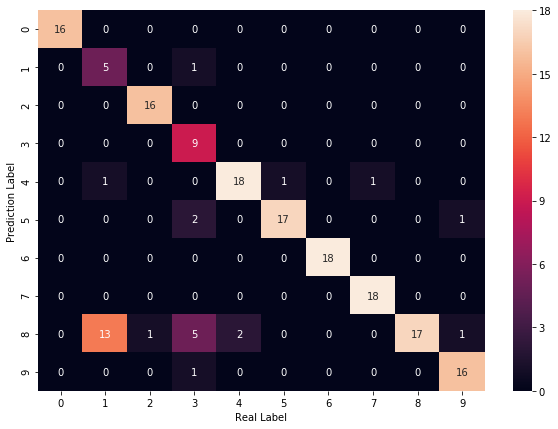

In [19]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [20]:
# 这里反而pred-outputs 的0 是第二类(id是1)，1是第一类（id是0）
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    vote = [0,0,0,0,0,0,0,0,0,0]
    for i in range(45):
        pred_outputs = get_pred_real(i, j)
        #print(i,classes[i],pred_outputs[0][0])
        
        vote_for = classes[i][1 - pred_outputs[0]]
        vote[vote_for] += 1#1 is class 1(id:0) and 0 is class 2(id:1)
    pred_value.append(np.where(vote==np.max(vote)))        
    #print(np.array(pred).T)

In [21]:
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])

In [22]:
np.sum(list_P == digits.target[:1617])/1617

0.9474335188620903

In [23]:
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)

In [24]:
np.mean(winner_fitness)

0.9884869018774932

In [25]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

numbers = [*range(2)]
number_of_classification = len(numbers)

list_nodes_number = []
list_connection_number = []

for winner in winner_list:
    used_nodes = list(winner.nodes.keys())
    # create a dict for mapping 
    l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
    l2 = range(len(l1))
    dict_nodes = dict(zip(l1, l2))

    ### 将节点加入图
    g = Graph(len(l1))# inputs + outputs + used  
    # add connections in the graph
    for cg in winner.connections.values():
        if cg.enabled:
            g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])

    v = numbers
    list_connections = []
    for vi in v:
        for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
            list_connections.append(g.isReachable(u, vi))

    nodes_inputs = range(number_of_classification, number_of_classification+ 64)
    nodes_outputs = range(number_of_classification)
    nodes_mid = range(number_of_classification + 64, len(dict_nodes))

    # 找到所有输入和输出连接的路
    all_path = []
    for u in nodes_inputs:
        for v in nodes_outputs:
            path = findAllPath(g.graph, u, v)
            if path:
                all_path = all_path + path

    # 得到最长路，以及每个节点在哪个层级
    max_length = max([len(x) for x in all_path])
    nodes_tuples_list = []
    for path in all_path:
        #print(path)
        for node in path:
            nodes_tuples_list.append([node, path.index(node)])

    # 确定节点的层级（消除重复）       
    nodes_tuples_fixed_list = []
    for index in range(max_length):
        for nodes in nodes_tuples_list:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                if nodes not in nodes_tuples_fixed_list:
                    nodes_tuples_fixed_list.append(nodes)


    # 所有有连接的节点
    all_used_nodes = []
    for node in nodes_tuples_fixed_list:
        if node[0] not in all_used_nodes:
            all_used_nodes.append(node[0])

    # 确定节点的层级（最终确定）
    nodes_tuples_fixed_list_final = []

    for node in all_used_nodes:
        if node in nodes_inputs:
            nodes_tuples_fixed_list_final.append([node, 0])
        elif node in nodes_outputs:
            nodes_tuples_fixed_list_final.append([node, max_length - 1])
        else:
            list_node = []
            for nodes in nodes_tuples_fixed_list:
                if node == nodes[0]:
                    list_node.append(nodes)
            layer = 0
            for ele in list_node:
                # 删除重复项，取最大
                if ele[1] > layer:
                    layer = ele[1]
            nodes_tuples_fixed_list_final.append([node,layer])


    # 每个层级的节点合数
    length_of_layers = []
    number_of_nodes = 0
    for index in range(max_length):
        for nodes in nodes_tuples_fixed_list_final:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                number_of_nodes += 1
        length_of_layers.append(number_of_nodes)

    length_of_each_layer = []
    length_of_each_layer.append(length_of_layers[0])
    for i in range(1, max_length):
        length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

    # 输出每个层级的节点个数
    #print("length of each layers:", length_of_each_layer)

    # 所有端到端的路
    all_path_side2side = []
    for path in all_path:
        if len(path) == 2:
            all_path_side2side.append(path)
        else:
            for i in range(len(path)-1):
                all_path_side2side.append([path[i],path[i+1]])

    # 定义节点到绘图的字典
    dict_nodes_graph = dict()
    count_number_layer = [0] * max_length
    for nodes in nodes_tuples_fixed_list_final:
        node, layer = nodes
        dict_nodes_graph[node] = [count_number_layer[layer], layer]
        count_number_layer[layer] += 1
    list_nodes_number.append(np.sum(length_of_each_layer))
    list_connection_number.append(len(all_path_side2side))
    #print("Number of nodes:{} Number of connections:{}".format(np.sum(length_of_each_layer),len(all_path_side2side)))
print("Total nodes:{} Total connections::{}".format(np.sum(list_nodes_number), np.sum(list_connection_number)))

Total nodes:1008 Total connections::1301
